# Lab | Unsupervised Learning Intro




In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from random import randint  # for random wait time respectful scraping
from time import sleep      # sleep function

## Lab 6.01

In [2]:
url = "https://www.billboard.com/charts/hot-100/"
response = requests.get(url)
response.status_code # 200 status code means OK!


200

In [3]:
soup = BeautifulSoup(response.content, "html.parser")
# soup

In [4]:
#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(14) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-050.lrv-u-padding-l-1\@mobile-max
# ul > li.o-chart-results-list__item


In [5]:
#soup.select("#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(8) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-050.lrv-u-padding-l-1\@mobile-max")


In [6]:
#soup.select("li.o-chart-results-list__item")[0]

In [7]:
# for i in soup.select("li.o-chart-results-list__item > h3"):    # specific syntax
#     print(i.get_text())

In [8]:
len(soup.select("li.o-chart-results-list__item > h3"))
len(soup.select("li.o-chart-results-list__item > span:nth-child(2)"))
len(soup.select("li.lrv-u-width-100p > ul > li.o-chart-results-list__item:nth-child(1)"))

200

In [9]:
song_artist = []
for i in soup.select("li.lrv-u-width-100p > ul > li.o-chart-results-list__item:nth-child(1)"):
    #print(i.get_text())
    song_artist.append(i.get_text())

In [10]:
#song_artist

In [11]:
song = []
artist = []
for i in song_artist:
    i = i.split('\n\n\n')
    if len(i) == 2:
        artist.append(i[1].replace('\n\n','').lstrip())
        song.append(i[0].replace('\n\n',''))

In [12]:
song[0:10]

["All Too Well (Taylor's Version)",
 'Easy On Me',
 'Stay',
 'Industry Baby',
 'Smokin Out The Window',
 'Bad Habits',
 'Shivers',
 'Heat Waves',
 'Need To Know',
 'Fancy Like']

In [13]:
artist[0:10]

['Taylor Swift',
 'Adele',
 'The Kid LAROI & Justin Bieber',
 'Lil Nas X & Jack Harlow',
 'Silk Sonic (Bruno Mars & Anderson .Paak)',
 'Ed Sheeran',
 'Ed Sheeran',
 'Glass Animals',
 'Doja Cat',
 'Walker Hayes']

In [14]:
hot100 = pd.DataFrame({"song":song,
                       "artist":artist
                      })

In [15]:
# YEAH ,I cracked the Billboard Hot-100 !!!!!
hot100.head(5)

,song,artist
0,All Too Well (Taylor's Version),Taylor Swift
1,Easy On Me,Adele
2,Stay,The Kid LAROI & Justin Bieber
3,Industry Baby,Lil Nas X & Jack Harlow
4,Smokin Out The Window,Silk Sonic (Bruno Mars & Anderson .Paak)


In [16]:
# For saving time during next labs I temporarily write this results into a tmp file
hot100.to_csv ('tmp_hot100.csv', index = False, header=True)

## Lab 6.02

In [17]:
# # using header to avoind 403 error, server thinks I am a just a user browsing
# header = {
#   "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
#   "X-Requested-With": "XMLHttpRequest"
# }

# artist = []
# song = []
# years = range(1969, 2017)

# for y in years:
#     start_at= str(y)
#     wait_time = randint(1,4)
#     sleep(wait_time)
#     url = "https://playback.fm/charts/top-100-songs/" + start_at 
#     response = requests.get(url, headers=header)
#     soup = BeautifulSoup(response.content, "html.parser")
#     for i in soup.select("td:nth-child(2) > a"):
#         i = i.get_text()
#         i = i.replace('\n','')
#         artist.append(i)    
#     for i in soup.select("td.mobile-hide > a > span.song"):
#         i = i.get_text()
#         song.append(i) 
#     print("processed:", url, "with wait time:", wait_time, "- songs:", len(song), "artists:", len(artist))
# top_100 = pd.DataFrame({"song":song, "artist":artist})  
# top_100.shape

In [18]:
# top_100.head()

## Lab | API Wrappers

<br>

<details><summary>▶ Instructions:</summary>
<p>

It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

Check whether or not the song is in the Billboard Hot 200.
Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

</p>
</details>

In [19]:
import requests
import pandas as pd
from time import sleep 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
import time

In [20]:
secrets_file = open("secrets.txt","r")
string = secrets_file.read()

In [21]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]
# secrets_dict

In [22]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [23]:
def get_playlist_tracks(playlist_id):
    init_s = time.time()
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        init_e = time.time()
        if init_e-init_s > 100:   # re-init at 100 sec.
            spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))       
            print(init_s-init_e, 'Stay alive')
            init_s = time.time()
        sleep(randint(1,3))
    return tracks

In [24]:
# get some coffee
start = time.time()

lst_pl = ['4VwQ8oKy4iVbUa6TSDQEB0','0V8jbEIKC4ppJBHiCRdtRL','59KM8m44lmfnGW6khGAsn9',   # test1, test5, classic
          '35i05dxUnfnU0ulnimZh3V','37i9dQZF1DWTmvXBN4DgpA',#'29isGIzk5nnq9J9fnjDgD4',   # jazz, top-2000, longest 
          '1rpa9cJm4ZPW2hhcuHfhvv','03sDEv7FN58Mb9CJOs1Tgn','0mStf5UM1VDU0ShoxNf11m',   # metal, reggeaton
          '5SqR3iQ1rvzjjB8vEPlF8d','4hdH7uPmzHCt0FGPBKOV4G','37i9dQZF1DX4AyFl3yqHeK',   # bachata, merengue, bossa nova
          '1y2WMKnxWDualAaqRgHOXf','37i9dQZF1DXbTxeAdrVG2l','06ye9lYBlxKIAiueSO7BVy',   # 80s, 90s
          '37i9dQZF1DWZBCPUIUs2iR','06S64oWn7uGnfGrwjh5IWb','0098gmqDhZTMCeGxXUBghm',   # country, dance, 2000
          '4o8NBsWreC3OnKePUYw0dg','78ZjgERKMglgYbqgJQZUFP','5rA2OHJUxeIqwRVrVZ2Wa0'    # Dutch, sinatra
         ]

title = []            # track name
artst = []            # artist name
t_uri = []            # song uri
popul = []            # popularity
dance = []            # danceability
energ = []            # energy
key = []              # key
loudn = []            # loudness
tmode = []            # mode
speec = []            # speechiness
acous = []            # acousticness
instr = []            # instrumentalness
liven = []            # liveness
valen = []            # valence
tempo = []            # tempo
durat = []            # duration_ms
times = []            # time_signature
tr_id = []            # song/track id


for p in lst_pl:
    n = 0                 # just a counter
    all_tracks = get_playlist_tracks(p)
    print('Songs received from spotify ('+p+')') 
    for track in all_tracks:
        start = time.time()
        # audio features
        audio_features = sp.audio_features(track["track"]["uri"])[0]  # only one time I/O
        title.append(track['track']['name'])
        tr_id.append(track["track"]["id"])
        t_uri.append(track["track"]["uri"])
        artst.append(track['track']['album']['artists'][0]['name'])
        popul.append(track['track']['popularity'])
        dance.append(audio_features['danceability'])
        energ.append(audio_features['energy'])
        key.append(audio_features['key'])
        loudn.append(audio_features['loudness'])
        tmode.append(audio_features['mode'])
        speec.append(audio_features['speechiness'])
        acous.append(audio_features['acousticness'])
        instr.append(audio_features['instrumentalness'])
        liven.append(audio_features['liveness'])
        valen.append(audio_features['valence'])
        tempo.append(audio_features['tempo'])
        durat.append(audio_features['duration_ms'])
        n += 1
    print('Features of',n,'songs assigned')
    
song_lake = pd.DataFrame({"song":title,
                          "name":artst,
                          "trackid":tr_id,
                          "trackuri":t_uri,
                          #"popul":popul, decide to leave out
                          "danceability":dance,
                          "energy":energ,
                          "key":key,
                          "loudness":loudn,
                          "mode":tmode,
                          "speechiness":speec,
                          "acousticness":acous,
                          "instrumentalness":instr,
                          "liveness":liven,
                          "valence":valen,
                          "tempo":tempo,
                          "duration_ms":durat
                         })

print(time.time()-start)

Songs received from spotify (4VwQ8oKy4iVbUa6TSDQEB0)
Features of 1 songs assigned
Songs received from spotify (0V8jbEIKC4ppJBHiCRdtRL)
Features of 5 songs assigned
Songs received from spotify (59KM8m44lmfnGW6khGAsn9)
Features of 122 songs assigned
Songs received from spotify (35i05dxUnfnU0ulnimZh3V)
Features of 68 songs assigned
Songs received from spotify (37i9dQZF1DWTmvXBN4DgpA)
Features of 1997 songs assigned
Songs received from spotify (1rpa9cJm4ZPW2hhcuHfhvv)
Features of 78 songs assigned
Songs received from spotify (03sDEv7FN58Mb9CJOs1Tgn)
Features of 145 songs assigned
Songs received from spotify (0mStf5UM1VDU0ShoxNf11m)
Features of 146 songs assigned
Songs received from spotify (5SqR3iQ1rvzjjB8vEPlF8d)
Features of 207 songs assigned
Songs received from spotify (4hdH7uPmzHCt0FGPBKOV4G)
Features of 75 songs assigned
Songs received from spotify (37i9dQZF1DX4AyFl3yqHeK)
Features of 57 songs assigned
Songs received from spotify (1y2WMKnxWDualAaqRgHOXf)
Features of 970 songs assigned

In [25]:
song_lake.head(60)

,song,name,trackid,trackuri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,"Bagatelle in A Minor, WoO 59 ""Für Elise""",Various Artists,50tFFbm0a9fp5K7tPTl0Gi,spotify:track:50tFFbm0a9fp5K7tPTl0Gi,0.3520,0.09490,9,-25.077,0,0.0466,0.99300,0.912000,0.1060,0.0519,131.865,196013
1,Never Tear Us Apart,INXS,1GjbTNFImFrjFsNdleDe78,spotify:track:1GjbTNFImFrjFsNdleDe78,0.6640,0.61300,0,-7.560,1,0.0273,0.00309,0.000128,0.1750,0.1930,96.600,184587
2,Need You Tonight,INXS,3h04eZTnmFLRMjZajbrp2R,spotify:track:3h04eZTnmFLRMjZajbrp2R,0.7950,0.63000,10,-7.217,0,0.0841,0.04190,0.575000,0.0894,0.7850,108.701,181107
3,New Sensation,INXS,2xcrseImDFEf8Urommws03,spotify:track:2xcrseImDFEf8Urommws03,0.6820,0.95400,9,-4.951,1,0.0625,0.00712,0.000040,0.0520,0.9280,115.475,220160
4,Never Tear Us Apart,INXS,3pyTksNccLM1jRvzQ4zTke,spotify:track:3pyTksNccLM1jRvzQ4zTke,0.6640,0.61300,0,-7.560,1,0.0273,0.00309,0.000128,0.1750,0.1930,96.600,184587
5,Original Sin,INXS,7G67ZJRQT9nn2Fa9vA6B32,spotify:track:7G67ZJRQT9nn2Fa9vA6B32,0.6850,0.63300,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.7310,131.397,317240
6,Theme From Schindler's List,John Williams,3DzMT13HJV7EsbVbNZZJZQ,spotify:track:3DzMT13HJV7EsbVbNZZJZQ,0.1170,0.13400,2,-24.162,0,0.0415,0.86400,0.838000,0.0977,0.0769,83.830,255160
7,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",Georges Bizet,2r1FiNXh5mDNEP8K07YRVp,spotify:track:2r1FiNXh5mDNEP8K07YRVp,0.3630,0.11500,2,-17.325,1,0.0689,0.97600,0.000000,0.0992,0.2310,134.424,262147
8,"Puccini: Madama Butterfly, Act 2: ""Un bel di v...",Giacomo Puccini,69EKwvg7nkdOO3RmeUMJZG,spotify:track:69EKwvg7nkdOO3RmeUMJZG,0.2070,0.17000,1,-11.784,1,0.0404,0.99100,0.024300,0.0804,0.0827,77.235,287907
9,"Puccini: Gianni Schicchi, Act 1: ""O mio babbin...",Giacomo Puccini,78k57V2uo6Sm72j1H7Ih14,spotify:track:78k57V2uo6Sm72j1H7Ih14,0.1700,0.10800,8,-16.626,1,0.0424,0.97200,0.071500,0.1530,0.0792,74.536,154507


In [26]:
len(song_lake)

10405

In [27]:
# For saving time during next lab I temporarily write this results into a file
song_lake.to_csv ('tmp_song_lake.csv', index = False, header=True)

## Lab | Unsupervised Learning

<br>

<details><summary>▶ Instructions:</summary>
<p>

To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

</p>
</details>

### but first come up with a prototype

In previous labs I skipped the first prototype for user input. I will do that now, before the clustering assignment.

In [28]:
# comment this out in the final version
import pandas as pd
song_lake = pd.read_csv('tmp_song_lake.csv')
hot100 = pd.read_csv('tmp_hot100.csv')

In [29]:
song_lake.head()

,song,name,trackid,trackuri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,"Bagatelle in A Minor, WoO 59 ""Für Elise""",Various Artists,50tFFbm0a9fp5K7tPTl0Gi,spotify:track:50tFFbm0a9fp5K7tPTl0Gi,0.352,0.0949,9,-25.077,0,0.0466,0.99300,0.912000,0.1060,0.0519,131.865,196013
1,Never Tear Us Apart,INXS,1GjbTNFImFrjFsNdleDe78,spotify:track:1GjbTNFImFrjFsNdleDe78,0.664,0.6130,0,-7.560,1,0.0273,0.00309,0.000128,0.1750,0.1930,96.600,184587
2,Need You Tonight,INXS,3h04eZTnmFLRMjZajbrp2R,spotify:track:3h04eZTnmFLRMjZajbrp2R,0.795,0.6300,10,-7.217,0,0.0841,0.04190,0.575000,0.0894,0.7850,108.701,181107
3,New Sensation,INXS,2xcrseImDFEf8Urommws03,spotify:track:2xcrseImDFEf8Urommws03,0.682,0.9540,9,-4.951,1,0.0625,0.00712,0.000040,0.0520,0.9280,115.475,220160
4,Never Tear Us Apart,INXS,3pyTksNccLM1jRvzQ4zTke,spotify:track:3pyTksNccLM1jRvzQ4zTke,0.664,0.6130,0,-7.560,1,0.0273,0.00309,0.000128,0.1750,0.1930,96.600,184587


In [30]:
# hot100.head()

### MVP Song Recommender

In [31]:
import random

print('Song recommender | version 0.1')
print('==============================')
song_in = input("What's your most favorite song?  ").title()
print('Song:', song_in)
artist_in = input('Artist or group (optional):  ').title()
print('Artist:', artist_in)

if hot100[(hot100['song'] == song_in)].count()[0] > 0:  # if song exist, then advise random from hot100
    print('Another Hot-100 song:')
    advice = hot100.iloc[random.choice(hot100.index)]
    song_out = advice[0]
    artist_out = advice[1]
    print(song_out, 'by:', artist_out)
else:             # if song doesnt exist, then advise random from song_lake (based on nothing)
    print("Not a Hot-100 song, but perhaps you'd like:")
    advice = song_lake.iloc[random.choice(song_lake.index)]
    song_out = advice[0]
    artist_out = advice[1]
    print(song_out, 'by:', artist_out)


Song recommender | version 0.1
What's your most favorite song?  gtt
Song: Gtt
Artist or group (optional):  hhh
Artist: Hhh
Not a Hot-100 song, but perhaps you'd like:
World Gone Mad by: Bastille


### Preparing song_lake for clustering

Steps:
1. StandardScaler
2. KMeans

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
import pickle

In [33]:
song_lake_num = song_lake.drop(['song','name','trackid','trackuri'],axis=1)

In [34]:
# song_lake_num made numeric to  cluster features
scaler = StandardScaler().fit(song_lake_num)
song_lake_scaled = scaler.transform(song_lake_num)
song_lake_scaled = pd.DataFrame(song_lake_scaled,columns=song_lake_num.columns)

In [35]:
song_lake_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-1.658661,-2.831355,1.055841,-4.918701,-1.314031,-0.383264,2.955258,5.748921,-0.508420,-1.973610,0.395551,-0.547382
1,0.292355,-0.212552,-1.467234,-0.056674,0.761017,-0.627528,-0.875151,-0.257660,-0.039271,-1.396374,-0.876325,-0.711681
2,1.111531,-0.126623,1.336183,0.038529,-1.314031,0.091342,-0.724978,3.529072,-0.621288,1.025483,-0.439887,-0.761721
3,0.404913,1.511076,1.055841,0.667481,0.761017,-0.182031,-0.859557,-0.258237,-0.875580,1.610492,-0.195575,-0.200164
4,0.292355,-0.212552,-1.467234,-0.056674,0.761017,-0.627528,-0.875151,-0.257660,-0.039271,-1.396374,-0.876325,-0.711681


In [36]:
# Save output
song_lake_scaled.to_csv('features_scaled.csv')
# Pickling the scaler
pickle.dump(scaler, open('standardscaler.pkl', 'wb'))

In [37]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(song_lake_scaled)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

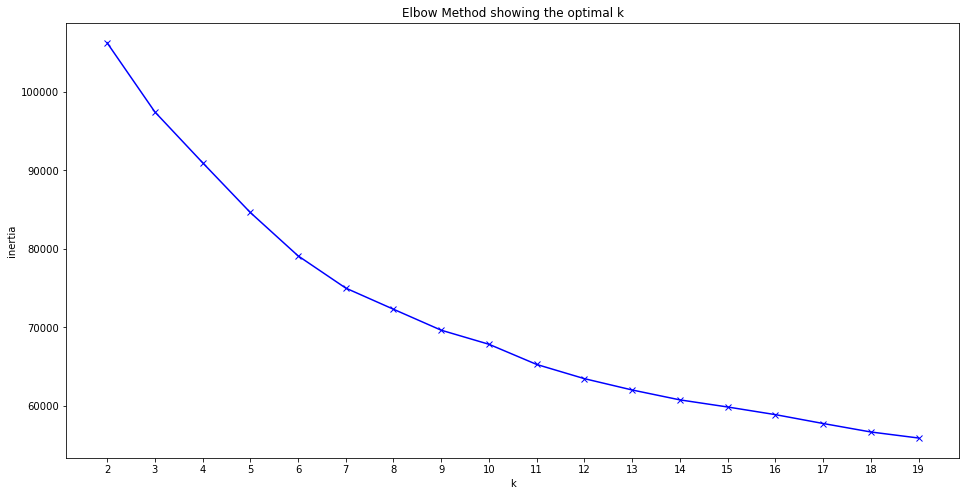

In [38]:
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [39]:
kmeans = KMeans(n_clusters=6, random_state=1234).fit(song_lake_scaled)
clusters = kmeans.predict(song_lake_scaled)
pd.Series(clusters).value_counts().sort_index()

0     351
1    1654
2    1773
3    2517
4    3262
5     848
dtype: int64

In [40]:
# there is a little elbow to be seen at 6, or maybe at 8
kmeans.inertia_

79127.58359149963

In [41]:
# adding clusterinfo to the df
song_lake_clustered = pd.concat([song_lake,pd.Series(clusters)],axis=1)
song_lake_clustered = song_lake_clustered.rename(columns={0:'clust'})

In [42]:
song_lake_clustered

,song,name,trackid,trackuri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clust
0,"Bagatelle in A Minor, WoO 59 ""Für Elise""",Various Artists,50tFFbm0a9fp5K7tPTl0Gi,spotify:track:50tFFbm0a9fp5K7tPTl0Gi,0.352,0.0949,9,-25.077,0,0.0466,0.993000,0.912000,0.1060,0.0519,131.865,196013,0
1,Never Tear Us Apart,INXS,1GjbTNFImFrjFsNdleDe78,spotify:track:1GjbTNFImFrjFsNdleDe78,0.664,0.6130,0,-7.560,1,0.0273,0.003090,0.000128,0.1750,0.1930,96.600,184587,4
2,Need You Tonight,INXS,3h04eZTnmFLRMjZajbrp2R,spotify:track:3h04eZTnmFLRMjZajbrp2R,0.795,0.6300,10,-7.217,0,0.0841,0.041900,0.575000,0.0894,0.7850,108.701,181107,3
3,New Sensation,INXS,2xcrseImDFEf8Urommws03,spotify:track:2xcrseImDFEf8Urommws03,0.682,0.9540,9,-4.951,1,0.0625,0.007120,0.000040,0.0520,0.9280,115.475,220160,4
4,Never Tear Us Apart,INXS,3pyTksNccLM1jRvzQ4zTke,spotify:track:3pyTksNccLM1jRvzQ4zTke,0.664,0.6130,0,-7.560,1,0.0273,0.003090,0.000128,0.1750,0.1930,96.600,184587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10400,Last Train Home,John Mayer,0tgBtQ0ISnMQOKorrN9HLX,spotify:track:0tgBtQ0ISnMQOKorrN9HLX,0.591,0.8310,4,-6.612,1,0.0355,0.235000,0.001420,0.0571,0.6780,93.007,187307,4
10401,Paper Planes,Lucas & Steve,4mrAArfFEIqpH6myouJb03,spotify:track:4mrAArfFEIqpH6myouJb03,0.643,0.7620,7,-4.003,0,0.0373,0.052500,0.000000,0.3450,0.3990,125.947,186667,3
10402,Dopamine (feat. Eyelar),Purple Disco Machine,0KzCNeuMVGXbnMbjX6ilCU,spotify:track:0KzCNeuMVGXbnMbjX6ilCU,0.689,0.7970,11,-5.604,0,0.1280,0.053700,0.000000,0.2120,0.8550,117.982,216092,3
10403,Higher Power,Coldplay,0939D7aT18uBDS2MTjWzct,spotify:track:0939D7aT18uBDS2MTjWzct,0.507,0.8280,10,-6.023,1,0.0449,0.007110,0.000024,0.2610,0.4890,178.032,211295,2


In [43]:
# save clustered song_lake
song_lake_clustered.to_csv('song_lake_clustered.csv')
# pickle KMeans
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

### Conclusion intertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph

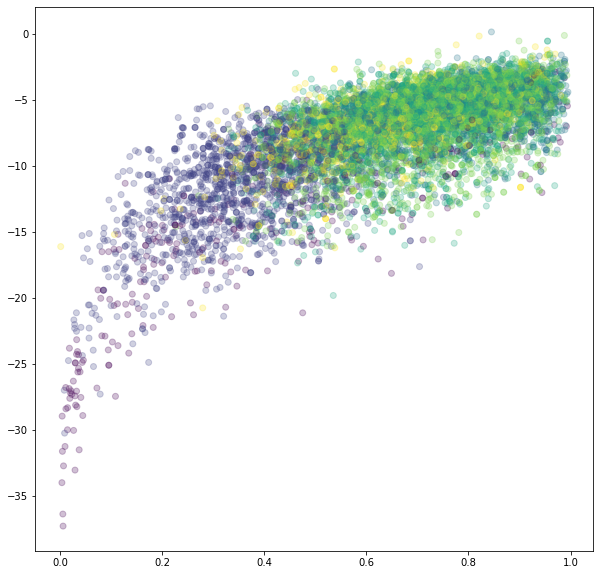

In [44]:
# First play with some graphs
# interesting: energ+loudn, rest is not clearly clustered

plt.figure(figsize=(10, 10))
plt.scatter(song_lake_clustered['energy'], song_lake_clustered['loudness'], c=clusters,alpha=0.25)
plt.show()

# App development "Put't-on"

Based on everything from this notebook, an app will be developed in a seperate notebook. From what I see now the flow will consist of the following:
* getting user input
* when not found in the Billboard Hot-100:
* song will be extracted from Spotify
* based on the same features as the model 
* and scaled accordingly, the cluster will be identified for that song
* from this cluster a random song will be advised
* the app "Put-t-On"  will be packaged as an .py app